# 220115 SVM Classfication model
## - GIS Partial Discharge: Noise , Surface PD, Particle PD 

## 1. Python Module

In [2]:
# 경로 설정 패키지
import os

# 데이터 전처리 패키지
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler #정규화 패키지

# 기계학습 모델 및 평가 패키지
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold
from scipy.stats import skew, kurtosis
from tqdm import tqdm

# 시각화 패키지
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

#한글 폰트 설정 
plt.rc('font', family='Malgun Gothic')

## 2. Data Pre-processing

In [249]:
# Noise_data

os.chdir("C:/Users/taeyu/PRPD data Test/data/noise") #데이터 경로, 수정
print(os.getcwd())

data_name = []

for i in range(50):
    data = 'noise ({0}).csv'.format(i) # 수정 
    data_name.append(data)

    
    
for j, k in zip(range(0,50),data_name):    
    df = pd.read_csv(k, header=None, index_col = False) # Dataframe 데이터
    test_data= df.to_numpy() # ndarray data
    
    feature_file = np.ones((3600,10), dtype=None, order='C')
    feature_file_mean = np.ones((1,11), dtype=None, order='C')
    
    for a in (range(3600)):
        feature_file[a,0] = skew(test_data[a,0:63]); # 60hZ 반주기 왜도(Positive)
        feature_file[a,1] = skew(test_data[a,64:127]); # 60hZ 반주기 왜도(Negaitive)
        feature_file[a,2] = kurtosis(test_data[a,0:63]); # 60hZ 반주기 첨도(Positive)
        feature_file[a,3] = kurtosis(test_data[a,64:127]); # 60hZ 반주기 첨도(Negaitive)
        feature_file[a,4] = np.max(test_data[a,0:63]); # 60hZ 반주기 최대값(Positive)
        feature_file[a,5] = np.max(test_data[a,64:127]); # 60hZ 반주기 최대값(Negaitive)
        feature_file[a,6] = np.mean(test_data[a,0:63]); # 60hZ 반주기 평균(Positive)
        feature_file[a,7] = np.mean(test_data[a,64:127]); # 60hZ 반주기 평균(Negaitive)
        feature_file[a,8] = np.count_nonzero(test_data[a,0:63]>40); # 60hZ 반주기 PD 신호 개수, threshhold 수정 
        feature_file[a,9] = np.count_nonzero(test_data[a,64:127]>40); # 60hZ 반주기 PD 신호 개수, threshhold 수정 
        
        feature_file_mean[0,0] = np.mean(feature_file[:,0]); #3600 사이클 평균 
        feature_file_mean[0,1] = np.mean(feature_file[:,1]); 
        feature_file_mean[0,2] = np.mean(feature_file[:,2]);
        feature_file_mean[0,3] = np.mean(feature_file[:,3]);
        feature_file_mean[0,4] = np.mean(feature_file[:,4]);
        feature_file_mean[0,5] = np.mean(feature_file[:,5]);
        feature_file_mean[0,6] = np.mean(feature_file[:,6]);
        feature_file_mean[0,7] = np.mean(feature_file[:,7]);
        feature_file_mean[0,8] = np.mean(feature_file[:,8]);
        feature_file_mean[0,9] = np.mean(feature_file[:,9]);
        feature_file_mean[0,10] = 0 # Noise 라벨링  수정필요
        
    globals()['prpd_{}'.format(j)] = pd.DataFrame(feature_file_mean);


df_noise = pd.concat([prpd_0, prpd_1, prpd_2, prpd_3, prpd_4, prpd_5, prpd_6, prpd_7, prpd_8, prpd_9, prpd_10, prpd_11,
                         prpd_12, prpd_13,  prpd_14, prpd_15 , prpd_16,  prpd_17, prpd_18, prpd_19, prpd_20,
                         prpd_21 , prpd_22,prpd_23,  prpd_24 , prpd_25, prpd_26,  prpd_27,  prpd_28, prpd_29,  prpd_30,
                        prpd_31, prpd_32, prpd_33, prpd_34, prpd_35 , prpd_36 , prpd_37 , prpd_38 , prpd_39 , prpd_40 , prpd_41,
                        prpd_42, prpd_43, prpd_44 , prpd_45 , prpd_46, prpd_47 , prpd_48, prpd_49])

C:\Users\taeyu\PRPD data Test\data\noise


In [250]:
# Surface_data

os.chdir("C:/Users/taeyu/PRPD data Test/data/surface") #수정 
print(os.getcwd())

data_name = []

for i in range(50):
    data = 'surface ({0}).csv'.format(i) #수정 
    data_name.append(data)

    
    
for j, k in zip(range(0,50),data_name):    
    df = pd.read_csv(k, header=None, index_col = False) # Dataframe 데이터
    test_data= df.to_numpy() # ndarray data
    
    feature_file = np.ones((3600,10), dtype=None, order='C')
    feature_file_mean = np.ones((1,11), dtype=None, order='C')
    
    for a in (range(3600)):
        feature_file[a,0] = skew(test_data[a,0:63]);
        feature_file[a,1] = skew(test_data[a,64:127]);
        feature_file[a,2] = kurtosis(test_data[a,0:63]);
        feature_file[a,3] = kurtosis(test_data[a,64:127]);
        feature_file[a,4] = np.max(test_data[a,0:63]);
        feature_file[a,5] = np.max(test_data[a,64:127]);
        feature_file[a,6] = np.mean(test_data[a,0:63]);
        feature_file[a,7] = np.mean(test_data[a,64:127]);
        feature_file[a,8] = np.count_nonzero(test_data[a,0:63]>40); #  threshhold 수정
        feature_file[a,9] = np.count_nonzero(test_data[a,64:127]>40); #  threshhold 수정
        
        feature_file_mean[0,0] = np.mean(feature_file[:,0]);
        feature_file_mean[0,1] = np.mean(feature_file[:,1]);
        feature_file_mean[0,2] = np.mean(feature_file[:,2]);
        feature_file_mean[0,3] = np.mean(feature_file[:,3]);
        feature_file_mean[0,4] = np.mean(feature_file[:,4]);
        feature_file_mean[0,5] = np.mean(feature_file[:,5]);
        feature_file_mean[0,6] = np.mean(feature_file[:,6]);
        feature_file_mean[0,7] = np.mean(feature_file[:,7]);
        feature_file_mean[0,8] = np.mean(feature_file[:,8]);
        feature_file_mean[0,9] = np.mean(feature_file[:,9]);
        feature_file_mean[0,10] = 1 # Surface 라벨링              수정 필요 
        
    globals()['prpd_{}'.format(j)] = pd.DataFrame(feature_file_mean);


df_surface = pd.concat([prpd_0, prpd_1, prpd_2, prpd_3, prpd_4, prpd_5, prpd_6, prpd_7, prpd_8, prpd_9, prpd_10, prpd_11,
                         prpd_12, prpd_13,  prpd_14, prpd_15 , prpd_16,  prpd_17, prpd_18, prpd_19, prpd_20,
                         prpd_21 , prpd_22,prpd_23,  prpd_24 , prpd_25, prpd_26,  prpd_27,  prpd_28, prpd_29,  prpd_30,
                        prpd_31, prpd_32, prpd_33, prpd_34, prpd_35 , prpd_36 , prpd_37 , prpd_38 , prpd_39 , prpd_40 , prpd_41,
                        prpd_42, prpd_43, prpd_44 , prpd_45 , prpd_46, prpd_47 , prpd_48, prpd_49]) #수정 

C:\Users\taeyu\PRPD data Test\data\surface


In [251]:
# Particle_data

os.chdir("C:/Users/taeyu/PRPD data Test/data/particle") #수정 
print(os.getcwd())

data_name = []

for i in range(50):
    data = 'particle ({0}).csv'.format(i) #수정 
    data_name.append(data)

    
    
for j, k in zip(range(0,50),data_name):    
    df = pd.read_csv(k, header=None, index_col = False) # Dataframe 데이터
    test_data= df.to_numpy() # ndarray data
    
    feature_file = np.ones((3600,10), dtype=None, order='C')
    feature_file_mean = np.ones((1,11), dtype=None, order='C')
    
    for a in (range(3600)):
        feature_file[a,0] = skew(test_data[a,0:63]);
        feature_file[a,1] = skew(test_data[a,64:127]);
        feature_file[a,2] = kurtosis(test_data[a,0:63]);
        feature_file[a,3] = kurtosis(test_data[a,64:127]);
        feature_file[a,4] = np.max(test_data[a,0:63]);
        feature_file[a,5] = np.max(test_data[a,64:127]);
        feature_file[a,6] = np.mean(test_data[a,0:63]);
        feature_file[a,7] = np.mean(test_data[a,64:127]);
        feature_file[a,8] = np.count_nonzero(test_data[a,0:63]>40); #  threshhold 수정
        feature_file[a,9] = np.count_nonzero(test_data[a,64:127]>40); #  threshhold 수정
        
        feature_file_mean[0,0] = np.mean(feature_file[:,0]);
        feature_file_mean[0,1] = np.mean(feature_file[:,1]);
        feature_file_mean[0,2] = np.mean(feature_file[:,2]);
        feature_file_mean[0,3] = np.mean(feature_file[:,3]);
        feature_file_mean[0,4] = np.mean(feature_file[:,4]);
        feature_file_mean[0,5] = np.mean(feature_file[:,5]);
        feature_file_mean[0,6] = np.mean(feature_file[:,6]);
        feature_file_mean[0,7] = np.mean(feature_file[:,7]);
        feature_file_mean[0,8] = np.mean(feature_file[:,8]);
        feature_file_mean[0,9] = np.mean(feature_file[:,9]);
        feature_file_mean[0,10] = 2 # Particle 라벨링        수정필요
        
    globals()['prpd_{}'.format(j)] = pd.DataFrame(feature_file_mean);


df_particle = pd.concat([prpd_0, prpd_1, prpd_2, prpd_3, prpd_4, prpd_5, prpd_6, prpd_7, prpd_8, prpd_9, prpd_10, prpd_11,
                         prpd_12, prpd_13,  prpd_14, prpd_15 , prpd_16,  prpd_17, prpd_18, prpd_19, prpd_20,
                         prpd_21 , prpd_22,prpd_23,  prpd_24 , prpd_25, prpd_26,  prpd_27,  prpd_28, prpd_29,  prpd_30,
                        prpd_31, prpd_32, prpd_33, prpd_34, prpd_35 , prpd_36 , prpd_37 , prpd_38 , prpd_39 , prpd_40 , prpd_41,
                        prpd_42, prpd_43, prpd_44 , prpd_45 , prpd_46, prpd_47 , prpd_48, prpd_49]) #수정 

C:\Users\taeyu\PRPD data Test\data\particle


In [252]:
df_particle.head() # 데이터 확인

,0,1,2,3,4,5,6,7,8,9,10
0,0.567045,0.515959,3.234663,3.002908,39.993056,39.460000,23.760608,23.734519,0.306667,0.288333,2.0
0,0.538798,0.527597,3.111290,3.037666,40.222222,40.338889,24.314735,24.344211,0.331389,0.344167,2.0
0,0.495405,0.496435,2.939055,2.959802,39.717222,39.695833,24.068668,24.042659,0.334444,0.355278,2.0
0,0.512526,0.532221,3.091883,3.240748,39.418333,39.851389,23.773108,23.802593,0.320278,0.337778,2.0
0,0.540941,0.541855,3.068137,2.946031,41.355278,41.165833,24.912297,24.891834,0.509167,0.510278,2.0


In [253]:
df_noise.head() # 데이터 확인

,0,1,2,3,4,5,6,7,8,9,10
0,-0.150807,-0.158633,0.065633,0.076435,35.898889,35.853333,23.509158,23.533810,0.399722,0.390556,0.0
0,-0.107208,-0.101258,0.031938,0.046717,36.038611,35.976389,23.505154,23.440728,0.313333,0.305833,0.0
0,-0.187568,-0.186178,-0.038144,-0.053965,36.794444,36.761111,23.949916,23.942857,0.446389,0.451389,0.0
0,-0.172591,-0.175004,-0.034001,-0.002295,36.636111,36.681667,23.894237,23.921398,0.443333,0.443611,0.0
0,-0.156255,-0.156627,0.059400,0.053473,35.563333,35.563889,23.252817,23.238915,0.254167,0.266667,0.0


In [254]:
df_surface.head() # 데이터 확인

,0,1,2,3,4,5,6,7,8,9,10
0,1.442844,1.240729,0.440786,-0.199365,137.732500,145.538333,42.684837,47.311477,14.508056,16.440000,1.0
0,4.834999,4.650689,26.547104,24.967074,112.664444,110.403333,26.387394,26.421609,2.129722,2.291111,1.0
0,4.602775,4.731960,25.192435,25.329000,106.564722,115.289444,26.257822,26.648735,2.038611,2.443056,1.0
0,4.638266,4.800331,25.626348,26.071785,108.128611,116.145556,26.232403,26.628902,1.951944,2.344722,1.0
0,4.627851,4.474606,25.175692,21.967838,108.526389,117.396111,26.417015,27.206014,2.056389,2.647500,1.0


In [255]:
final_data = pd.concat([df_noise, df_surface, df_particle])

os.chdir("C:/Users/taeyu/PRPD data Test") #수정 
print(os.getcwd())

final_data.to_csv('prpd_final.csv', index=False, header=None) 

C:\Users\taeyu\PRPD data Test


## 3. 데이터 불러오기(다변랑 데이터)

In [80]:
df = pd.read_csv('prpd_final.csv', header=None, index_col = False) # Dataframe 데이터
df.head(150)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.150807,-0.158633,0.065633,0.076435,35.898889,35.853333,23.509158,23.533810,0.399722,0.390556,0.0
1,-0.107208,-0.101258,0.031938,0.046717,36.038611,35.976389,23.505154,23.440728,0.313333,0.305833,0.0
2,-0.187568,-0.186178,-0.038144,-0.053965,36.794444,36.761111,23.949916,23.942857,0.446389,0.451389,0.0
3,-0.172591,-0.175004,-0.034001,-0.002295,36.636111,36.681667,23.894237,23.921398,0.443333,0.443611,0.0
4,-0.156255,-0.156627,0.059400,0.053473,35.563333,35.563889,23.252817,23.238915,0.254167,0.266667,0.0
...,...,...,...,...,...,...,...,...,...,...,...
145,1.985893,2.010755,13.925018,14.182191,89.749167,89.151111,28.806354,28.755666,3.562222,3.511667,2.0
146,2.008265,2.127956,13.839536,14.733699,87.697500,89.559167,27.407914,27.418095,2.183333,2.164167,2.0
147,0.409379,0.394548,2.312080,2.240634,42.081944,41.838611,25.311548,25.311711,0.682222,0.678333,2.0
148,0.547326,0.588756,3.236168,3.310633,40.219167,40.477500,23.864969,23.873611,0.332778,0.340278,2.0


In [81]:
df.describe() # 통계량값 확인.

,0,1,2,3,4,5,6,7,8,9,10
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.645822,1.570542,9.392421,8.837862,69.789994,68.394028,26.326565,26.479600,2.401850,2.539567,1.000000
std,1.858436,1.785987,10.132238,9.550123,34.614276,33.723828,3.991721,4.718361,2.999695,3.368747,0.819232
min,-0.190818,-0.200468,-0.051172,-0.260500,33.305833,33.337778,21.813541,21.802050,0.056944,0.053333,0.000000
25%,-0.070569,-0.069881,0.360415,0.327060,36.308611,36.292569,23.847840,23.842371,0.334653,0.345000,0.000000
50%,0.557186,0.563354,3.399299,3.339619,53.546389,53.424861,26.018547,25.950172,1.810833,1.860694,1.000000
75%,3.931173,3.423978,20.946662,18.505459,104.009653,96.744653,27.767492,27.801905,3.109444,3.286181,2.000000
max,4.936425,5.088308,30.116488,29.593029,145.590833,145.538333,45.014484,47.514352,15.378056,16.805556,2.000000


In [82]:
data = df.to_numpy() # ndarray data
print(data)  # 데이터 인덱싱 

[[-0.15080725 -0.15863297  0.06563296 ...  0.39972222  0.39055556
   0.        ]
 [-0.10720801 -0.10125814  0.03193799 ...  0.31333333  0.30583333
   0.        ]
 [-0.18756807 -0.18617781 -0.03814442 ...  0.44638889  0.45138889
   0.        ]
 ...
 [ 0.40937927  0.39454758  2.31208001 ...  0.68222222  0.67833333
   2.        ]
 [ 0.54732642  0.58875569  3.23616763 ...  0.33277778  0.34027778
   2.        ]
 [ 0.47736306  0.44532893  2.92508589 ...  0.31138889  0.29611111
   2.        ]]


In [83]:
X = data[:,0:10] # 독립 변수(feature)
Y = data[:,10] # 종속 변수 (target)

## 4. 데이터 분리(학습 8: 테스트 2) 

In [84]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2022) 

## 5. 데이터 정규화

In [100]:
## Scaling

#normalizer = StandardScaler()
#X_train = normalizer.fit_transform(X_train)
#X_test = normalizer.transform(X_test)


## 6. SVM 학습

In [116]:
# SVM 학습 (Best 조건)
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', gamma=0.01, C=1)
classifier.fit(X_train, Y_train)

classifier.score(X_test,Y_test)

## SVM 학습 방법을 활용하였지만 아래의 학습 방법을 이용하여도 됨 
## DecisionTreeClassifier() 트리모델
## RandomForestClassifier() 랜덤포레스트
## KNeighborsClassifier() K-최접근 
## SVC(kernel="linear"), 서포터 벡터 머신 
## GaussianNB(), 가우시안 NB
## LogisticRegression(), 로지스트 회귀 

1.0

## 7. 학습결과

In [117]:
# train, test acc

Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

acc_train = accuracy_score(Y_train, Y_train_pred)
acc_test = accuracy_score(Y_test, Y_test_pred)

print('Training Accuracy: {:3f}'. format(acc_train))
print('Testing Accuracy: {:3f}'. format(acc_test))

Training Accuracy: 1.000000
Testing Accuracy: 1.000000


C:\Users\taeyu\.conda\envs\taeyun\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


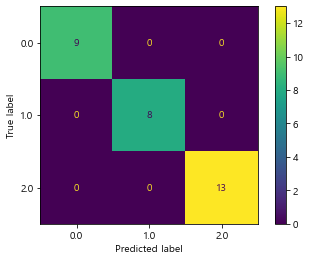

In [103]:
# 혼돈 행렬 (대각선 이외의 값은 예측에 실패한 개수를 표현하기 때문에 대각선 값이 크게 나타나야지 좋다고 볼수 있음, 테스트에 90개 사용)
plot_confusion_matrix(classifier, X_test, Y_test)
plt.show()

## 8. 최적화 및 교차 검증(GridSearchCV)

In [114]:
# gridsearch 

from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
  
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose= 3)

  
# fitting the model for grid search
grid.fit(X_train, Y_train);

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.375 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.417 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.458 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.958 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.958 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 3/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 4/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 5/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.958 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.958 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=10, gam

In [113]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

## 9. 데이터 확인

In [105]:
os.chdir("C:/Users/taeyu/PRPD data Test")
print(os.getcwd())

dt = pd.read_csv('test(n).csv', header=None, index_col = False) # Dataframe 데이터
dt.head()

C:\Users\taeyu\PRPD data Test


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,18,18,23,23,13,23,18,32,18,23,...,32,18,18,23,23,13,23,18,23,13
1,23,18,27,13,23,18,18,18,23,23,...,18,23,18,27,18,23,18,18,23,27
2,18,23,4,23,32,37,41,32,32,37,...,23,18,27,23,32,23,23,23,27,23
3,23,18,32,27,18,18,18,27,13,23,...,23,23,13,23,18,23,13,23,18,13
4,27,18,32,18,23,13,23,13,27,18,...,32,32,27,32,32,32,37,27,27,37


In [106]:
test_data= dt.to_numpy() # ndarray data
print(test_data)
print(test_data.shape)

[[18 18 23 ... 18 23 13]
 [23 18 27 ... 18 23 27]
 [18 23  4 ... 23 27 23]
 ...
 [32 32 32 ... 23 23 27]
 [18 27 32 ... 32 27 32]
 [27 32 27 ... 18 23 18]]
(3600, 128)


In [107]:
# 특징 추출 

feature_file = np.ones((3600,10), dtype=None, order='C')
feature_file_mean = np.ones((1,10), dtype=None, order='C')

In [108]:
for a in (range(3600)):
    feature_file[a,0] = skew(test_data[a,0:63]);
    feature_file[a,1] = skew(test_data[a,64:127]);
    feature_file[a,2] = kurtosis(test_data[a,0:63]);
    feature_file[a,3] = kurtosis(test_data[a,64:127]);
    feature_file[a,4] = np.max(test_data[a,0:63]);
    feature_file[a,5] = np.max(test_data[a,64:127]);
    feature_file[a,6] = np.mean(test_data[a,0:63]);
    feature_file[a,7] = np.mean(test_data[a,64:127]);
    feature_file[a,8] = np.count_nonzero(test_data[a,0:63]>40);
    feature_file[a,9] = np.count_nonzero(test_data[a,64:127]>40);
print(feature_file)   
print(feature_file.shape) 

test_data = feature_file_mean

[[-2.40189344e-02 -6.74427838e-02  2.02592266e-02 ...  2.09682540e+01
   0.00000000e+00  0.00000000e+00]
 [-2.43475017e-01 -2.33313558e-01  6.63091465e-02 ...  2.18253968e+01
   0.00000000e+00  0.00000000e+00]
 [-1.07495156e+00  5.40653075e-02  1.60946749e+00 ...  2.21111111e+01
   4.00000000e+00  0.00000000e+00]
 ...
 [-8.83292067e-01 -7.50619300e-01  2.29168472e+00 ...  2.71746032e+01
   1.00000000e+00  0.00000000e+00]
 [-8.26439366e-01 -5.42489972e-01  1.48965769e+00 ...  2.75396825e+01
   1.00000000e+00  0.00000000e+00]
 [-1.85615606e+00 -2.01628914e-01  6.26807985e+00 ...  2.07460317e+01
   0.00000000e+00  0.00000000e+00]]
(3600, 10)


In [109]:
feature_file_mean[0,0] = np.mean(feature_file[:,0]);
feature_file_mean[0,1] = np.mean(feature_file[:,1]);
feature_file_mean[0,2] = np.mean(feature_file[:,2]);
feature_file_mean[0,3] = np.mean(feature_file[:,3]);
feature_file_mean[0,4] = np.mean(feature_file[:,4]);
feature_file_mean[0,5] = np.mean(feature_file[:,5]);
feature_file_mean[0,6] = np.mean(feature_file[:,6]);
feature_file_mean[0,7] = np.mean(feature_file[:,7]);
feature_file_mean[0,8] = np.mean(feature_file[:,8]);
feature_file_mean[0,9] = np.mean(feature_file[:,9]);
print(feature_file_mean)
print(feature_file_mean.shape)

[[-0.13688193 -0.14786978  0.12961204  0.1335755  35.85861111 35.93333333
  23.60424162 23.64428131  0.37305556  0.38388889]]
(1, 10)


In [110]:
Y_pred = classifier.predict(test_data)

In [111]:
print(Y_pred)

if Y_pred == 0:
        print('예측 결과 : Noise.')
if Y_pred == 1:
        print('예측 결과 : Surface.')
if Y_pred == 2:
        print('예측 결과 : Particle.')

[0.]
예측 결과 : Noise.
